### HOUSE PRICE PREDICTION REGRESSION PROJECT

### 1. Load Modules/libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 2. Load Dataset

In [3]:
house_data=r'kc_house_data.csv'

df=pd.read_csv(house_data)

### 3. About Dataset

In [4]:
pd.set_option("display.max_columns",None)  #it will display the all the columns of datasets.

In [5]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
def row_col_info(df):
    print(f"Total number of rows: {df.shape[0]}")
    print(f"Total number of columns: {df.shape[1]}")
    
    
row_col_info(df)

Total number of rows: 21613
Total number of columns: 21


In [7]:
df.info() #Clean dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 4. Data Cleaning and Preprocessing

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is no missing value present in the dataset.

In [9]:
pd.set_option('display.float_format',lambda x:'%.3f'%x)

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


### Dropping the unnecessary columns which include (id,date)

In [11]:
df.drop(['id','date'],axis=1,inplace=True)

In [12]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


### Visualize the attributes.

<Axes: >

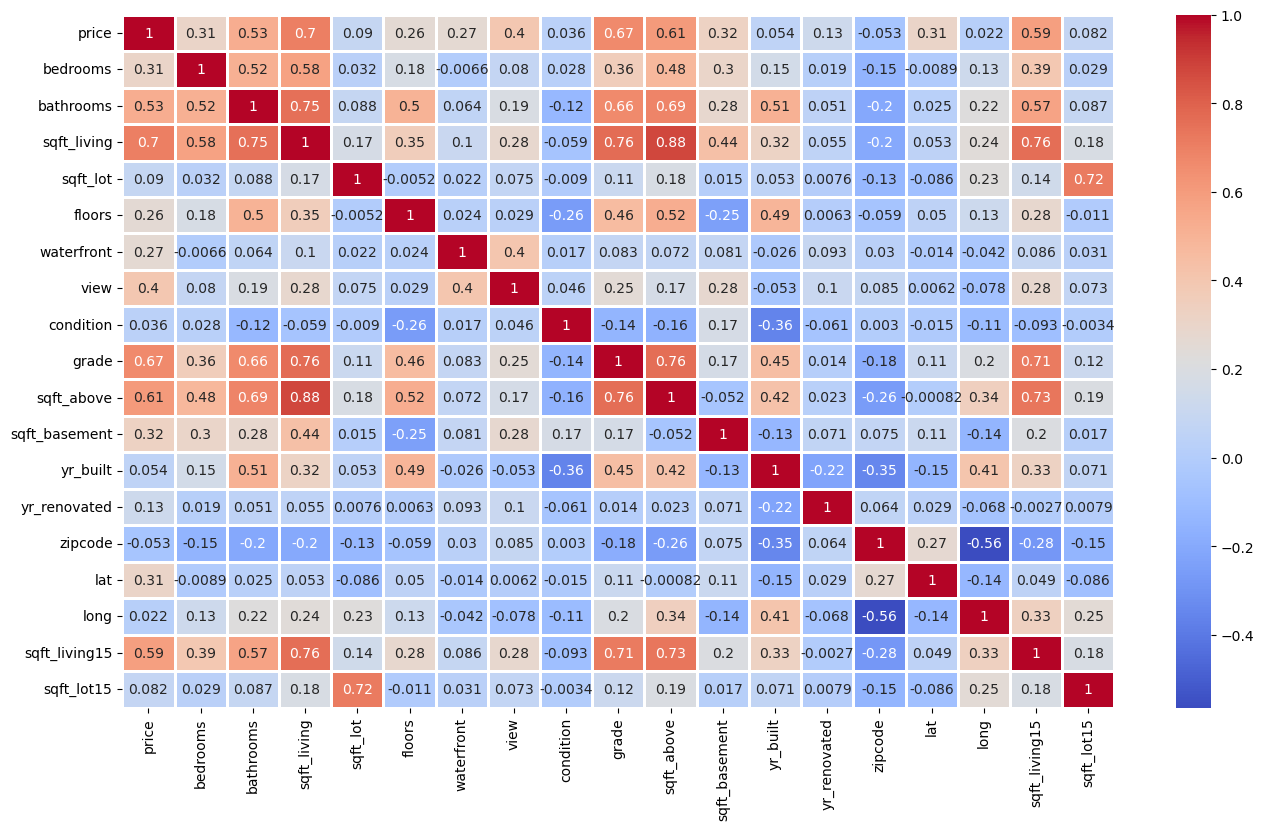

In [13]:
correlation_matrix=df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=0.8)

Values weakly correlated to price are: sqft_lot,yr_renovated, zipcode, long, sqft_lot15, condition, yr_built, 

### 5.Feature Selection Engineering

In [14]:
#Dropping the attributes
df.drop(['sqft_lot','yr_renovated','zipcode','long','sqft_lot15','condition','yr_built'],axis=1,inplace=True)
row_col_info(df)

Total number of rows: 21613
Total number of columns: 12


In [15]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.000,3,1.000,1180,1.000,0,0,7,1180,0,47.511,1340
1,538000.000,3,2.250,2570,2.000,0,0,7,2170,400,47.721,1690
2,180000.000,2,1.000,770,1.000,0,0,6,770,0,47.738,2720
3,604000.000,4,3.000,1960,1.000,0,0,7,1050,910,47.521,1360
4,510000.000,3,2.000,1680,1.000,0,0,8,1680,0,47.617,1800
5,1225000.000,4,4.500,5420,1.000,0,0,11,3890,1530,47.656,4760
6,257500.000,3,2.250,1715,2.000,0,0,7,1715,0,47.310,2238
7,291850.000,3,1.500,1060,1.000,0,0,7,1060,0,47.410,1650
8,229500.000,3,1.000,1780,1.000,0,0,7,1050,730,47.512,1780
9,323000.000,3,2.500,1890,2.000,0,0,7,1890,0,47.368,2390


In [16]:
for col in df:
    print (f'{col} : {len (df[df[col] == 0]) / len(df[col]) * 100 }')

price : 0.0
bedrooms : 0.0601489844075325
bathrooms : 0.046268449544255776
sqft_living : 0.0
floors : 0.0
waterfront : 99.24582427242864
view : 90.17258131680008
grade : 0.0
sqft_above : 0.0
sqft_basement : 60.73196687179012
lat : 0.0
sqft_living15 : 0.0


As most of the values are 0s in the waterfront and view so we are going to drop it.m

In [17]:
df.drop(['waterfront','view'],axis=1,inplace=True)
row_col_info(df)

Total number of rows: 21613
Total number of columns: 10


In [18]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.000,3,1.000,1180,1.000,7,1180,0,47.511,1340
1,538000.000,3,2.250,2570,2.000,7,2170,400,47.721,1690
2,180000.000,2,1.000,770,1.000,6,770,0,47.738,2720
3,604000.000,4,3.000,1960,1.000,7,1050,910,47.521,1360
4,510000.000,3,2.000,1680,1.000,8,1680,0,47.617,1800
5,1225000.000,4,4.500,5420,1.000,11,3890,1530,47.656,4760
6,257500.000,3,2.250,1715,2.000,7,1715,0,47.310,2238
7,291850.000,3,1.500,1060,1.000,7,1060,0,47.410,1650
8,229500.000,3,1.000,1780,1.000,7,1050,730,47.512,1780
9,323000.000,3,2.500,1890,2.000,7,1890,0,47.368,2390


In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,lat,sqft_living15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,1.494,7.657,1788.391,291.509,47.560,1986.552
std,367127.196,0.930,0.770,918.441,0.540,1.175,828.091,442.575,0.139,685.391
min,75000.000,0.000,0.000,290.000,1.000,1.000,290.000,0.000,47.156,399.000
25%,321950.000,3.000,1.750,1427.000,1.000,7.000,1190.000,0.000,47.471,1490.000
50%,450000.000,3.000,2.250,1910.000,1.500,7.000,1560.000,0.000,47.572,1840.000
75%,645000.000,4.000,2.500,2550.000,2.000,8.000,2210.000,560.000,47.678,2360.000
max,7700000.000,33.000,8.000,13540.000,3.500,13.000,9410.000,4820.000,47.778,6210.000


In [20]:
exclude_column='price'

numerical_columns=[col for col in df.columns if col!=exclude_column]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns]) 
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,lat,sqft_living15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000
std,367127.196,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,75000.000,-3.624,-2.746,-1.949,-0.915,-5.663,-1.809,-0.659,-2.917,-2.316
25%,321950.000,-0.399,-0.474,-0.711,-0.915,-0.559,-0.723,-0.659,-0.643,-0.724
50%,450000.000,-0.399,0.176,-0.185,0.011,-0.559,-0.276,-0.659,0.085,-0.214
75%,645000.000,0.676,0.500,0.512,0.937,0.292,0.509,0.607,0.851,0.545
max,7700000.000,31.858,7.642,12.478,3.714,4.546,9.204,10.232,1.570,6.162


In [21]:
df.sort_values(by='price',ascending=False).head(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,lat,sqft_living15
7252,7700000.000,2.827,7.642,10.856,1.862,4.546,8.190,7.205,0.503,2.850
3914,7062500.000,1.752,3.097,8.667,0.937,2.844,7.115,4.674,0.649,2.836
9254,6885000.000,2.827,7.317,8.504,0.937,4.546,8.540,1.669,0.508,3.726
4411,5570000.000,1.752,4.720,7.753,0.937,4.546,5.328,6.120,0.497,2.296
1448,5350000.000,1.752,3.746,6.446,0.937,3.695,5.956,2.234,0.456,3.813
1315,5300000.000,2.827,5.045,5.782,0.937,3.695,3.878,4.742,0.022,3.405
1164,5110800.000,1.752,4.071,6.457,0.937,3.695,5.074,3.906,0.842,2.106
8092,4668000.000,1.752,6.019,8.232,-0.915,3.695,3.661,10.232,-0.022,1.873
2626,4500000.000,1.752,4.396,4.965,0.937,3.695,5.509,-0.003,1.366,1.522
8638,4489000.000,0.676,1.149,4.737,0.937,3.695,5.605,-0.659,0.438,2.529


In [22]:
mean_value=df[df['price']>645000].mean()[0]

In [23]:
df.drop(df[df['price']>mean_value].index,inplace=True)
row_col_info(df)

Total number of rows: 20053
Total number of columns: 10


In [24]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,lat,sqft_living15
count,20053.000,20053.000,20053.000,20053.000,20053.000,20053.000,20053.000,20053.000,20053.000,20053.000
mean,465198.598,-0.057,-0.104,-0.142,-0.045,-0.136,-0.122,-0.067,-0.032,-0.119
std,193422.002,0.978,0.910,0.818,0.993,0.859,0.855,0.911,1.024,0.873
min,75000.000,-3.624,-2.746,-1.949,-0.915,-5.663,-1.809,-0.659,-2.917,-2.316
25%,313000.000,-0.399,-0.798,-0.751,-0.915,-0.559,-0.747,-0.659,-0.744,-0.768
50%,432000.000,-0.399,-0.149,-0.261,-0.915,-0.559,-0.348,-0.659,0.039,-0.287
75%,590000.000,0.676,0.500,0.349,0.937,0.292,0.340,0.471,0.866,0.384
max,987500.000,31.858,6.993,5.880,3.714,3.695,4.736,5.487,1.570,4.324


### 6. Dataset Splitting

In [25]:
y = df["price"]
X = df.drop("price" ,axis = 1)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

### 7. Train ML models

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [27]:
def score_calculation(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", round(mse,3)*100)
    print("R-squared:", round(r2,3)*100)

### i. Gradient Boosting Regressor

In [28]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

score_calculation(y_test,y_pred)

Mean Squared Error: 837707103512.1
R-squared: 77.7


### ii. KNN Regressor

In [29]:
knn= KNeighborsRegressor()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

score_calculation(y_test,y_pred)

Mean Squared Error: 1007277169826.3
R-squared: 73.2


### iii. Decision Tree Regressor

In [30]:
dt= DecisionTreeRegressor()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

score_calculation(y_test,y_pred)

Mean Squared Error: 1555225919499.2
R-squared: 58.599999999999994


### iv. Random Forest Regressor

In [31]:
rf= RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

score_calculation(y_test,y_pred)

Mean Squared Error: 836084070009.3
R-squared: 77.8


Out of all this model random forest is giving us best results.

### Hyperparameter Tuning

In [32]:
def tune_and_evaluate(model,param_grid):
    
    grid_search = GridSearchCV(estimator= model,param_grid= param_grid,cv=5,n_jobs=-1,scoring='r2')
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    print("Best parameters are: ",best_params)
    print('Mean cross-validated score of the best_estimator is: ',best_score)
    print('-------------------------------------------------------------------')
    
    y_pred = best_estimator.predict(X_test)
    score_calculation(y_test,y_pred)
    
    return best_estimator

### a. Gradient Boosting Regressor

In [33]:
# hyperparameter tunning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': np.arange(3,6)
}

gbm= tune_and_evaluate(gbm,param_grid)

Best parameters are:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean cross-validated score of the best_estimator is:  0.7917814498689804
-------------------------------------------------------------------
Mean Squared Error: 787808176637.2
R-squared: 79.10000000000001


### b. KNN Regressor

In [ ]:
# hyperparameter tunning
param_grid = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn = tune_and_evaluate(knn,param_grid)

### c. Decision Tree Regressor

In [ ]:
# hyperparameter tunning
param_grid = {'max_depth': np.arange(2,10)}
dt = tune_and_evaluate(dt,param_grid)

### d. Random Forest 

In [ ]:
# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,12),
    'n_estimators': np.arange(25,101,25)
}
rf= tune_and_evaluate(rf,param_grid)

After Hyperparameter Tunning Gradient Boosting is giving the highest accuracy which is 79.0